In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
testImage = './data/hqdefault.jpg'

print(f'reading {testImage} into memory')
img = cv.imread(testImage, cv.IMREAD_GRAYSCALE)
if img is None:
    print(f'{testImage} could not be loaded')
else:
    print(f'{testImage} loaded')

reading ./data/hqdefault.jpg into memory
./data/hqdefault.jpg loaded


In [3]:
# running fourier transform using numpy's built in fft package (np.fft.fft2)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

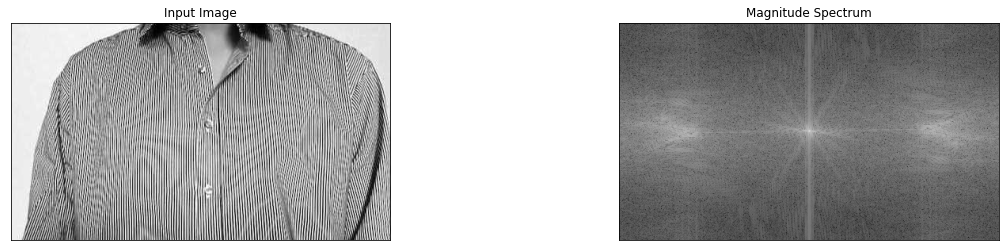

In [4]:
# As shown below 
plt.figure().set_figwidth(20)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

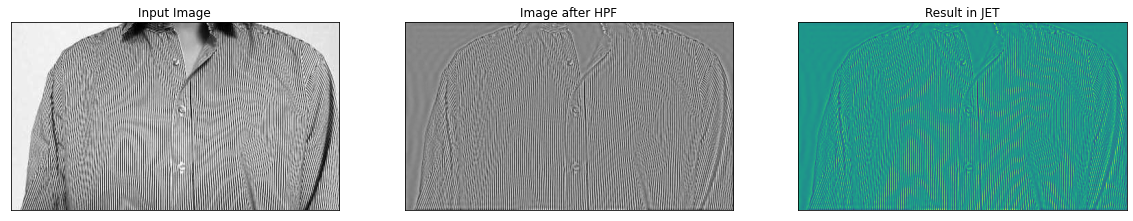

In [5]:
# running the fourier shifted image values through an inverse fourier shift yields an image with amplified magnitude 
#     of color surrounding where sharp 'edges' appear in source image
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.figure().set_figwidth(20)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()